## Part 1: testing API access

In [32]:
import json
import pandas as pd

In [23]:
fp = open('api_data.json', 'r')
api = json.load(fp)
api

{'$type': 'Tfl.Api.Presentation.Entities.StopPointsResponse, Tfl.Api.Presentation.Entities',
 'stopPoints': [{'$type': 'Tfl.Api.Presentation.Entities.StopPoint, Tfl.Api.Presentation.Entities',
   'naptanId': '490000149L',
   'indicator': 'Stop L',
   'stopLetter': 'L',
   'modes': ['bus'],
   'stopType': 'NaptanPublicBusCoachTram',
   'lines': [],
   'lineGroup': [],
   'lineModeGroups': [],
   'id': '490000149L',
   'commonName': ' Moorgate Station',
   'placeType': 'StopPoint',
   'additionalProperties': [{'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
     'category': 'Direction',
     'key': 'CompassPoint',
     'sourceSystemKey': 'Naptan490',
     'value': 'S'},
    {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
     'category': 'Direction',
     'key': 'Towards',
     'sourceSystemKey': 'CountDown',
     'value': 'T Aldwych or London Bridge'},
    {'$type': 'Tfl.Api.Presentation.Entitie

In [24]:
api.keys()

dict_keys(['$type', 'stopPoints', 'pageSize', 'total', 'page'])

In [51]:
len(api['stopPoints'][1]['lines'])

8

In [74]:
data = pd.DataFrame(api['stopPoints'], columns=['id', 'commonName', 'indicator', 'lat', 'lon', 'stopType'])
data['lines'] = [len(s['lines']) for s in api['stopPoints']]
data

id                          commonName indicator        lat  \
0      490000149L                    Moorgate Station    Stop L  51.517849   
1      490003025W                          Abbey Lane    Stop L  51.533785   
2    490G00003025                          Abbey Lane       NaN  51.533785   
3      490003027E                          Abbey Road    Stop X  51.539674   
4      490003027W                          Abbey Road    Stop M  51.539970   
..            ...                                 ...       ...        ...   
995    490003373E       Argyle Road / Avondale Avenue   Stop TT  51.613559   
996    490003373W       Argyle Road / Avondale Avenue   Stop RR  51.613376   
997    490G000392       Argyle Road / Avondale Avenue       NaN  51.613376   
998   490003375WB  Ariel Way / White City Bus Station   Stop WB  51.507412   
999   490003375WD  Ariel Way / White City Bus Station   Stop WD  51.508449   

          lon                        stopType  lines  
0   -0.088163        NaptanPublicBusCoachTram      0  
1   -0.007183        NaptanPublicBusCoachTram      8  
2   -0.007183  NaptanOnstreetBusCoachStopPair      8  
3   -0.187845        NaptanPublicBusCoachTram      3  
4   -0.186680        NaptanPublicBusCoachTram      3  
..        ...                             ...    ...  
995 -0.186392        NaptanPublicBusCoachTram      1  
996 -0.186139        NaptanPublicBusCoachTram      1  
997 -0.186139  NaptanOnstreetBusCoachStopPair      1  
998 -0.224502        NaptanPublicBusCoachTram      6  
999 -0.224721        NaptanPublicBusCoachTram      6  

[1000 rows x 7 columns]

In [75]:
data[data.indicator.isna()]

id                       commonName indicator        lat  \
2    490G00003025                       Abbey Lane       NaN  51.533785   
10   490G00003027                       Abbey Road       NaN  51.539108   
11   490G00003028                       Abbey Road       NaN  51.529348   
12   490G00003029                       Abbey Road       NaN  51.538675   
13   490G00006898                       Abbey Road       NaN  51.489395   
..            ...                              ...       ...        ...   
986  490G00019711  Argall Avenue Industrial Estate       NaN  51.571708   
989  490G00013455                   Argyle Gardens       NaN  51.557553   
993  490G00003370                      Argyle Road       NaN  51.533610   
994  490G00003372                      Argyle Road       NaN  51.516296   
997    490G000392    Argyle Road / Avondale Avenue       NaN  51.613376   

          lon                           stopType  lines  
2   -0.007183     NaptanOnstreetBusCoachStopPair      8  
10  -0.189036  NaptanOnstreetBusCoachStopCluster      3  
11  -0.269899     NaptanOnstreetBusCoachStopPair      3  
12  -0.279163     NaptanOnstreetBusCoachStopPair      1  
13   0.124068     NaptanOnstreetBusCoachStopPair      2  
..        ...                                ...    ...  
986 -0.037100     NaptanOnstreetBusCoachStopPair      1  
989  0.258800     NaptanOnstreetBusCoachStopPair      4  
993 -0.331288     NaptanOnstreetBusCoachStopPair      1  
994 -0.322221     NaptanOnstreetBusCoachStopPair      2  
997 -0.186139     NaptanOnstreetBusCoachStopPair      1  

[355 rows x 7 columns]

In [76]:
data[data.indicator.isna()].stopType.unique()

array(['NaptanOnstreetBusCoachStopPair',
       'NaptanOnstreetBusCoachStopCluster', 'NaptanRailStation',
       'NaptanMetroStation', 'NaptanBusCoachStation',
       'TransportInterchange'], dtype=object)

In [107]:
# Hindsight: should have processed to remove Rail and Metro entrance
data[~data.indicator.isna()].stopType.unique()

array(['NaptanPublicBusCoachTram', 'NaptanRailEntrance',
       'NaptanMetroEntrance'], dtype=object)

In [105]:
data[data.commonName=='Abbey Wood (London) Rail Station']

id                        commonName   indicator        lat  \
27  4900ABWD1  Abbey Wood (London) Rail Station  Entrance 1  51.490812   
28  4900ABWD2  Abbey Wood (London) Rail Station  Entrance 2  51.491630   
29  4900ABWD3  Abbey Wood (London) Rail Station  Entrance 3  51.491428   
30   910GABWD  Abbey Wood (London) Rail Station         NaN  51.491062   

         lon            stopType  lines  
27  0.121310  NaptanRailEntrance      0  
28  0.121853  NaptanRailEntrance      0  
29  0.120071  NaptanRailEntrance      0  
30  0.121394   NaptanRailStation     10

In [106]:
api['stopPoints'][27]

{'$type': 'Tfl.Api.Presentation.Entities.StopPoint, Tfl.Api.Presentation.Entities',
 'naptanId': '4900ABWD1',
 'indicator': 'Entrance 1',
 'stopLetter': '1',
 'modes': ['bus'],
 'icsCode': '1001001',
 'stopType': 'NaptanRailEntrance',
 'stationNaptan': '910GABWD',
 'lines': [],
 'lineGroup': [],
 'lineModeGroups': [],
 'status': True,
 'id': '4900ABWD1',
 'commonName': 'Abbey Wood (London) Rail Station',
 'placeType': 'StopPoint',
 'additionalProperties': [],
 'children': [],
 'lat': 51.490812,
 'lon': 0.12131}

## Part 2: Cleaning API data fetched with script

In [101]:
all_stops = pd.read_csv('london_stops.csv')
all_stops

id         commonName indicator                  stopType  \
0        490000149L   Moorgate Station    Stop L  NaptanPublicBusCoachTram   
1        490003025W         Abbey Lane    Stop L  NaptanPublicBusCoachTram   
2        490003027E         Abbey Road    Stop X  NaptanPublicBusCoachTram   
3        490003027W         Abbey Road    Stop M  NaptanPublicBusCoachTram   
4        490003028E         Abbey Road    Stop H  NaptanPublicBusCoachTram   
...             ...                ...       ...                       ...   
23534    490013275N      Zangwill Road   Stop SZ  NaptanPublicBusCoachTram   
23535    490013275S      Zangwill Road   Stop SU  NaptanPublicBusCoachTram   
23536  40004408016A       Zig Zag Road       adj  NaptanPublicBusCoachTram   
23537  40004408223A       Zig Zag Road       opp  NaptanPublicBusCoachTram   
23538    490009291A     Zsl London Zoo    Stop B  NaptanPublicBusCoachTram   

             lat       lon  lines  
0      51.517849 -0.088163      0  
1      51.533785 -0.007183      8  
2      51.539674 -0.187845      3  
3      51.539970 -0.186680      3  
4      51.529348 -0.269899      3  
...          ...       ...    ...  
23534  51.472283  0.045127      1  
23535  51.472046  0.045303      1  
23536  51.258173 -0.322678      1  
23537  51.258392 -0.322871      1  
23538  51.537365 -0.153964      1  

[23539 rows x 7 columns]

In [102]:
all_stops.stopType.unique()

array(['NaptanPublicBusCoachTram', 'NaptanRailEntrance',
       'NaptanMetroEntrance', 'NaptanCoachBay', 'NaptanFerryEntrance'],
      dtype=object)

In [103]:
all_stops[all_stops.stopType=='NaptanRailEntrance']

id                        commonName   indicator  \
16        4900ABWD1  Abbey Wood (London) Rail Station  Entrance 1   
17        4900ABWD2  Abbey Wood (London) Rail Station  Entrance 2   
18        4900ABWD3  Abbey Wood (London) Rail Station  Entrance 3   
81     4900ACTNCTL1        Acton Central Rail Station  Entrance 1   
82     4900ACTNCTL2        Acton Central Rail Station  Entrance 2   
...             ...                               ...         ...   
23281  4900WDMNSTR2        Woodmansterne Rail Station  Entrance 2   
23354  4900WOLWCDY1    Woolwich Dockyard Rail Station  Entrance 1   
23376  4900WRCSTRP1       Worcester Park Rail Station  Entrance 1   
23377  4900WRCSTRP2       Worcester Park Rail Station  Entrance 2   
23378  4900WRCSTRP3       Worcester Park Rail Station  Entrance 3   

                 stopType        lat       lon  lines  
16     NaptanRailEntrance  51.490812  0.121310      0  
17     NaptanRailEntrance  51.491630  0.121853      0  
18     NaptanRailEntrance  51.491428  0.120071      0  
81     NaptanRailEntrance  51.508625 -0.263507      0  
82     NaptanRailEntrance  51.508927 -0.262602      0  
...                   ...        ...       ...    ...  
23281  NaptanRailEntrance  51.318563 -0.154338      0  
23354  NaptanRailEntrance  51.491060  0.054351      0  
23376  NaptanRailEntrance  51.381209 -0.245284      0  
23377  NaptanRailEntrance  51.381199 -0.245227      0  
23378  NaptanRailEntrance  51.381079 -0.244973      0  

[283 rows x 7 columns]

In [99]:
all_stops = all_stops[(all_stops.stopType == 'NaptanPublicBusCoachTram') | (all_stops.stopType == 'NaptanCoachBay')]
all_stops.reset_index(drop=True, inplace=True)

In [ ]:
all_stops.to_csv('london_stops.csv', index=False)

In [100]:
all_stops

id         commonName indicator                  stopType  \
0        490000149L   Moorgate Station    Stop L  NaptanPublicBusCoachTram   
1        490003025W         Abbey Lane    Stop L  NaptanPublicBusCoachTram   
2        490003027E         Abbey Road    Stop X  NaptanPublicBusCoachTram   
3        490003027W         Abbey Road    Stop M  NaptanPublicBusCoachTram   
4        490003028E         Abbey Road    Stop H  NaptanPublicBusCoachTram   
...             ...                ...       ...                       ...   
23194    490013275N      Zangwill Road   Stop SZ  NaptanPublicBusCoachTram   
23195    490013275S      Zangwill Road   Stop SU  NaptanPublicBusCoachTram   
23196  40004408016A       Zig Zag Road       adj  NaptanPublicBusCoachTram   
23197  40004408223A       Zig Zag Road       opp  NaptanPublicBusCoachTram   
23198    490009291A     Zsl London Zoo    Stop B  NaptanPublicBusCoachTram   

             lat       lon  lines  
0      51.517849 -0.088163      0  
1      51.533785 -0.007183      8  
2      51.539674 -0.187845      3  
3      51.539970 -0.186680      3  
4      51.529348 -0.269899      3  
...          ...       ...    ...  
23194  51.472283  0.045127      1  
23195  51.472046  0.045303      1  
23196  51.258173 -0.322678      1  
23197  51.258392 -0.322871      1  
23198  51.537365 -0.153964      1  

[23199 rows x 7 columns]

## Part 3: testing London osmnx script

In [114]:
import osmnx
import shapely

In [109]:
london_polygon = osmnx.geocode_to_gdf('London, England, United Kingdom').geometry[0]

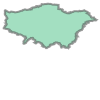

In [117]:
# Filling in city of London hole
shapely.geometry.polygon.Polygon(london_polygon.exterior)

In [118]:
london_graph = osmnx.graph_from_polygon(london_polygon, network_type='walk')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/envs/cusplondon/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-145519a8a77b>", line 1, in <module>
    london_graph = osmnx.graph_from_polygon(london_polygon, network_type='walk')
  File "/opt/anaconda3/envs/cusplondon/lib/python3.6/site-packages/osmnx/graph.py", line 433, in graph_from_polygon
    G_buff = truncate.truncate_graph_polygon(G_buff, poly_buff, True, truncate_by_edge)
  File "/opt/anaconda3/envs/cusplondon/lib/python3.6/site-packages/osmnx/truncate.py", line 181, in truncate_graph_polygon
    G = G.copy()
  File "/opt/anaconda3/envs/cusplondon/lib/python3.6/site-packages/networkx/classes/multigraph.py", line 962, in copy
    for u, nbrs in self._adj.items()
  File "/opt/anaconda3/envs/cusplondon/lib/python3.6/site-packages/networkx/classes/multigraph.py", line 528, in add_edges_from
    self[u][v][

TypeError: object of type 'NoneType' has no len()

In [119]:
import folium
m = folium.Map()
folium.Marker((51.50722222, -0.12750000)).add_to(m)
m